In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/AI-ML-1/Airbnb Price Prediction/airbnb2.csv")
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
# CHECKING FOR MISSING VALUES
df.isnull().sum()

,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,6
bed_type,0
cancellation_policy,0
cleaning_fee,0


In [5]:
#DROPPING MISSING VALUES
df.dropna(axis = 0, inplace = True, subset = ['first_review','host_response_rate','last_review','neighbourhood','host_has_profile_pic','host_identity_verified','host_since','thumbnail_url','zipcode'])

In [7]:
#REPLACING MISSING VALUES WITH MEAN
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df['beds'] = df['beds'].fillna(df['beds'].mean())

In [8]:
df_train, df_test  = train_test_split(df, test_size=0.2, random_state = 42)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 806 entries, 60 to 202
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      806 non-null    int64  
 1   log_price               806 non-null    float64
 2   property_type           806 non-null    object 
 3   room_type               806 non-null    object 
 4   amenities               806 non-null    object 
 5   accommodates            806 non-null    int64  
 6   bathrooms               806 non-null    float64
 7   bed_type                806 non-null    object 
 8   cancellation_policy     806 non-null    object 
 9   cleaning_fee            806 non-null    bool   
 10  city                    806 non-null    object 
 11  description             806 non-null    object 
 12  first_review            806 non-null    object 
 13  host_has_profile_pic    806 non-null    object 
 14  host_identity_verified  806 non-null    object

In [10]:
df_train.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,8.060000e+02,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000
mean,1.122904e+07,4.751109,3.168734,1.200264,38.742059,-91.486282,32.972705,94.449826,1.247189,1.784119
std,6.222406e+06,0.662254,2.087244,0.466599,3.028517,21.685440,44.704182,6.701798,0.829432,1.328351
min,1.206800e+04,2.944439,1.000000,0.000000,33.722757,-122.508521,1.000000,20.000000,0.000000,1.000000
25%,5.691018e+06,4.317488,2.000000,1.000000,34.190150,-118.344410,5.250000,92.000000,1.000000,1.000000
50%,1.242135e+07,4.691348,2.000000,1.000000,40.684712,-74.000822,15.000000,96.000000,1.000000,1.000000
75%,1.665650e+07,5.164786,4.000000,1.000000,40.758575,-73.949644,43.000000,99.000000,1.000000,2.000000
max,2.118810e+07,7.277939,16.000000,5.500000,42.382883,-71.049672,318.000000,100.000000,7.000000,16.000000


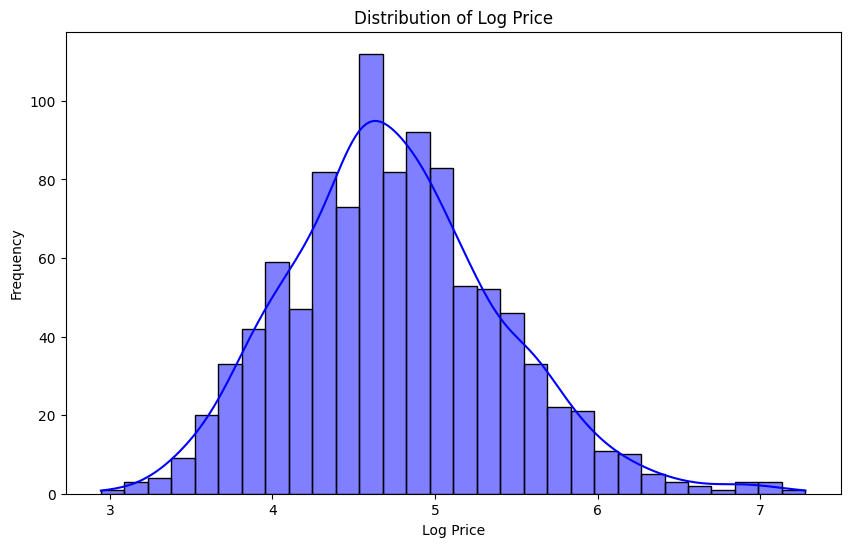

In [11]:
# distribution of price across the dataset

#histogram with kde for `log_price`
#KDE is the lining above the histogram indicates density estimate for better analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#qqplot of the price

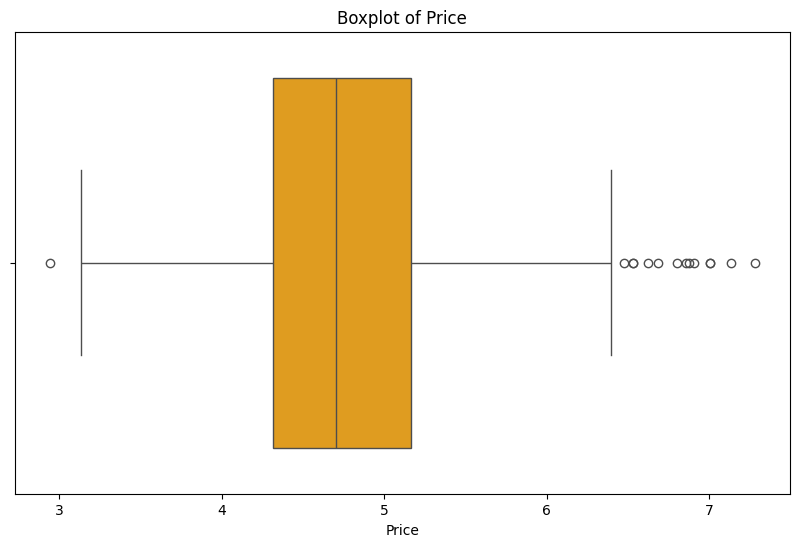

In [12]:
# check for outliers in the dataset (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_price'], color='orange')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

In [13]:
# Calculate Q1, Q3, and IQR
Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['log_price'] < lower_bound) | (df['log_price'] > upper_bound)]
print("Number of outliers: ", len(outliers))

Number of outliers:  14


In [14]:
#  Handle outliers
df_cleaned = df[(df['log_price'] >= lower_bound) & (df['log_price'] <= upper_bound)]
print(df_cleaned.shape)

(994, 29)


In [ ]:
# Handle the categorical values

In [ ]:
# Normalize the numerical values

# Model training

In [ ]:
# use linear regression to train the model

In [ ]:
# evaluate the model on the testing dataset